In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
import matplotx
plt.style.use(matplotx.styles.dracula)
plt.rcParams['figure.figsize'] = [20, 6]

### Chronic Kidney Disease Prediction : <br><hr>
**Attribute Information :**<br>
 	1.Age(numerical) : age in years<br>
 	2.Blood Pressure(numerical) : bp in mm/Hg<br>
 	3.Specific Gravity(nominal) : sg - (1.005,1.010,1.015,1.020,1.025) <br>
 	4.Albumin(nominal) : al - (0,1,2,3,4,5) <br>
 	5.Sugar(nominal) : su - (0,1,2,3,4,5) <br>
 	6.Red Blood Cells(nominal) : rbc - (normal,abnormal)<br>
 	7.Pus Cell (nominal) : pc - (normal,abnormal)<br>
 	8.Pus Cell clumps(nominal) : pcc - (present,notpresent)<br>
 	9.Bacteria(nominal) : ba  - (present,notpresent)<br>
 	10.Blood Glucose Random(numerical) : bgr in mgs/dl<br>
 	11.Blood Urea(numerical) : bu in mgs/dl<br>
 	12.Serum Creatinine(numerical) : sc in mgs/dl<br>
 	13.Sodium(numerical) : sod in mEq/L<br>
 	14.Potassium(numerical)	: pot in mEq/L<br>
 	15.Hemoglobin(numerical): hemo in gms<br>
 	16.Packed  Cell Volume(numerical)<br>
 	17.White Blood Cell Count(numerical) : wc in cells/cumm<br>
 	18.Red Blood Cell Count(numerical) : rc in millions/cmm<br>
 	19.Hypertension(nominal) : htn - (yes,no)<br>
 	20.Diabetes Mellitus(nominal) : dm - (yes,no)<br>
 	21.Coronary Artery Disease(nominal) : cad - (yes,no)<br>
 	22.Appetite(nominal) : appet - (good,poor)<br>
 	23.Pedal Edema(nominal) : pe - (yes,no)	<br>
 	24.Anemia(nominal) : ane - (yes,no)<br>
 	25.Class (nominal) : class - (ckd,notckd) [target]

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from classes.gen_helper import (EDA , FeatureEngineering, ModelTraining, Model_Finder)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import RandomOverSampler
import pickle
import os 

#ML Algothrims
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, make_scorer
import gzip

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("./data/kidney.csv")
df[['sg','al','sc','hemo','pcv','htn', 'classification']]


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.20,15.4,44,yes,ckd
1,1.020,4.0,0.80,11.3,38,no,ckd
2,1.010,2.0,1.80,9.6,31,no,ckd
3,1.005,4.0,3.80,11.2,32,yes,ckd
4,1.010,2.0,1.40,11.6,35,no,ckd
5,1.015,3.0,1.10,12.2,39,yes,ckd
6,1.010,0.0,24.00,12.4,36,no,ckd
7,1.015,2.0,1.10,12.4,44,no,ckd
8,1.015,3.0,1.90,10.8,33,yes,ckd
9,1.020,2.0,7.20,9.5,29,yes,ckd


In [60]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
df.dropna(inplace=True)
df['classification'] = df['classification'].replace({'ckd':1, 'notckd':0, 'ckd\t':1})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 399
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg              287 non-null    float64
 1   al              287 non-null    float64
 2   sc              287 non-null    float64
 3   hemo            287 non-null    float64
 4   pcv             287 non-null    object 
 5   htn             287 non-null    object 
 6   classification  287 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 17.9+ KB


In [61]:
df.describe(include=['object']).T

,count,unique,top,freq
pcv,287,40,44,19
htn,287,2,no,189


In [62]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
sg,287.0,1.017683,0.005789,1.005,1.015,1.02,1.025,1.025
al,287.0,0.986063,1.363798,0.000,0.000,0.00,2.000,5.000
sc,287.0,2.502787,3.346284,0.400,0.800,1.20,2.500,24.000
hemo,287.0,12.836934,2.821576,3.100,10.850,13.20,15.000,17.800
classification,287.0,0.540070,0.499262,0.000,0.000,1.00,1.000,1.000


In [63]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = df.select_dtypes('object').columns.tolist()
numeric_cols

['sg', 'al', 'sc', 'hemo']

In [64]:
#Check if the any column is having the ZERO std
data_described = df.describe()
for i in numeric_cols:
    print(i , data_described[i]['std'])

sg 0.005788868731792755
al 1.3637979810498566
sc 3.3462836969601675
hemo 2.8215755293151257


In [65]:
df['classification'].value_counts()

1    155
0    132
Name: classification, dtype: int64

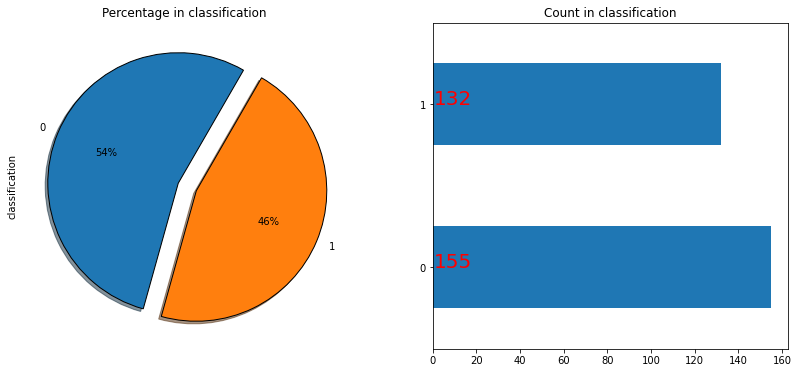

In [13]:
eda = EDA(df)
eda.plot_pie(target='classification')

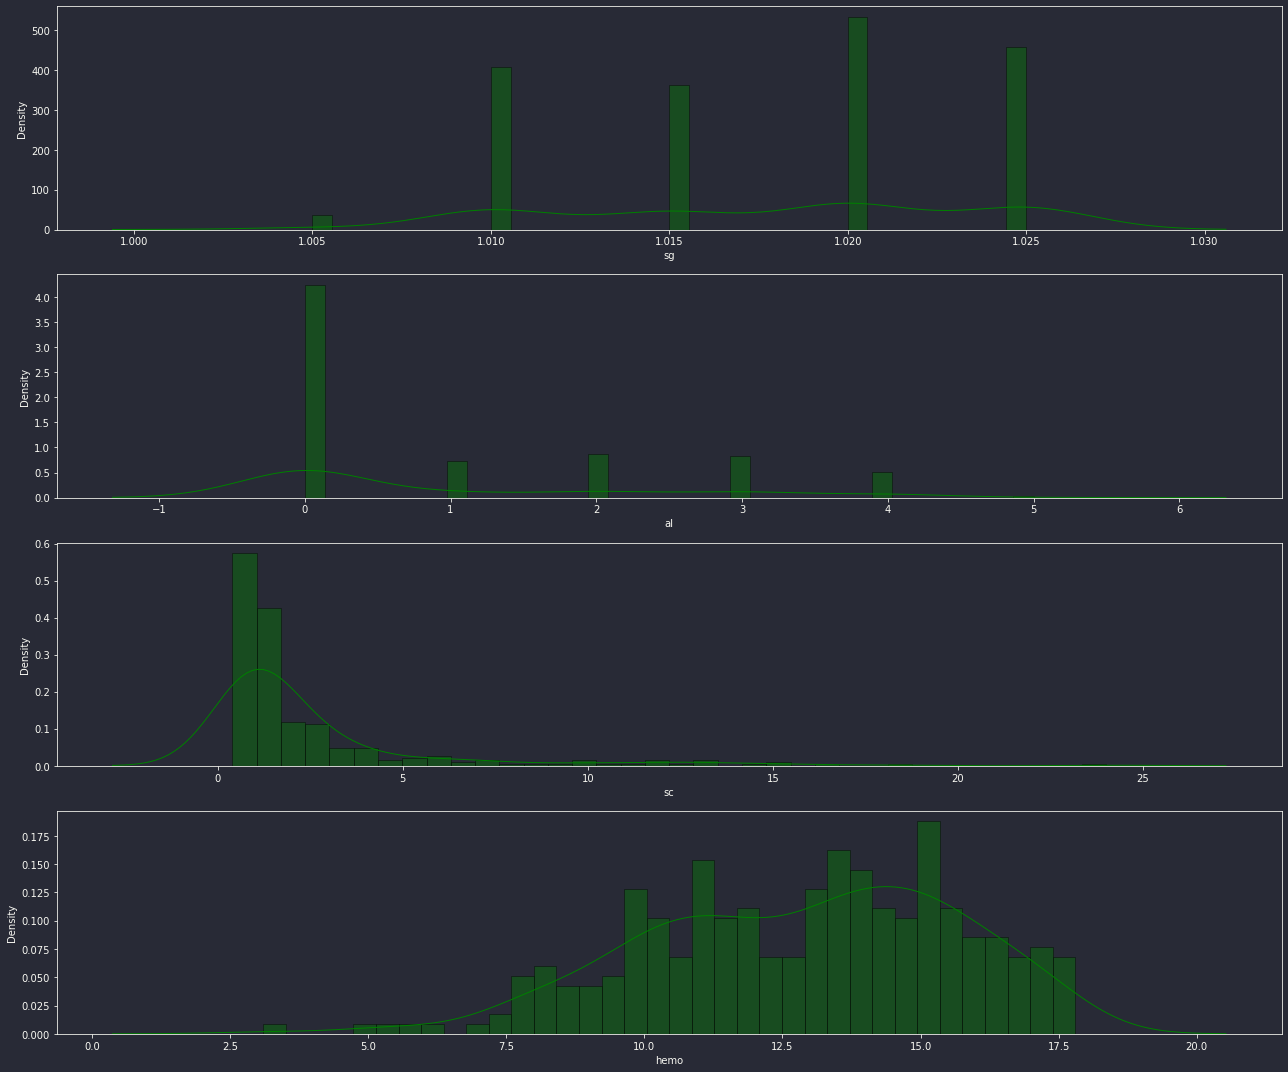

In [42]:
eda.plot_histogram(df[numeric_cols], columns=1, fig_height=15)

In [43]:
#eda.box_plot(df[numeric_cols], fig_height=10)

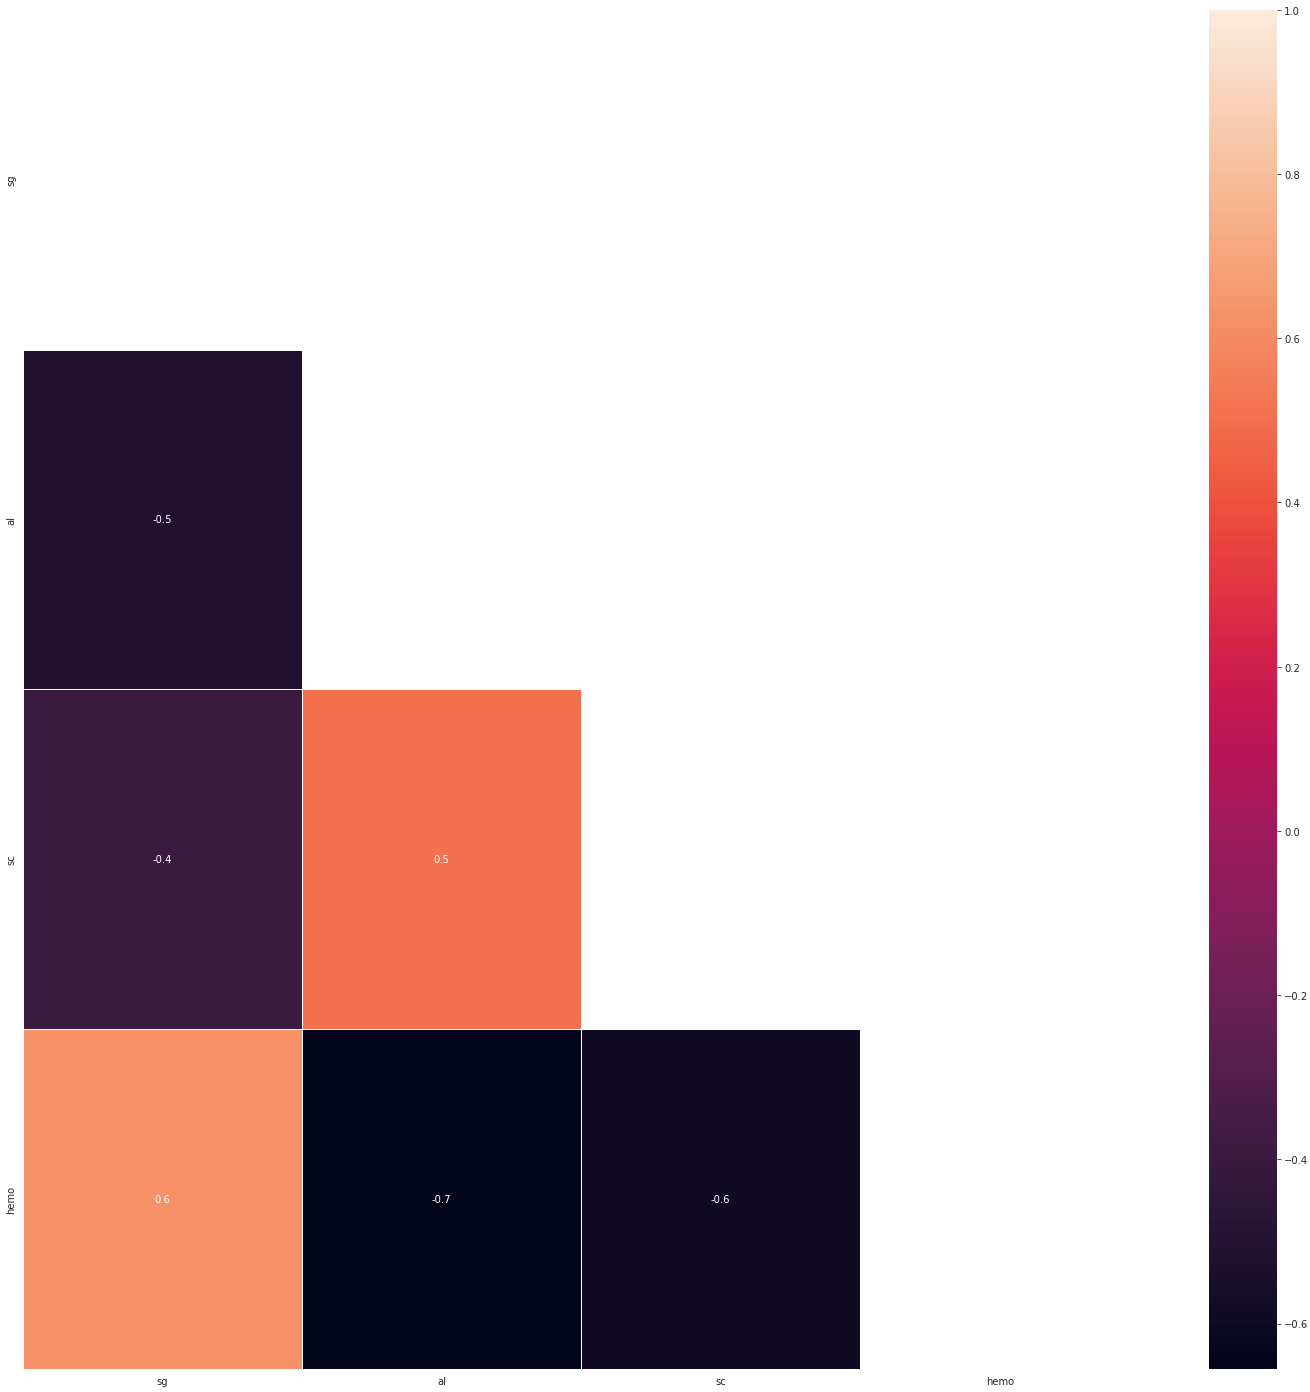

In [44]:
eda.corr_map(df[numeric_cols])

In [66]:
y = df['classification']
list = ['classification']
X = df.drop(list,axis = 1 )
X 

,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,44,yes
1,1.020,4.0,0.8,11.3,38,no
2,1.010,2.0,1.8,9.6,31,no
3,1.005,4.0,3.8,11.2,32,yes
4,1.010,2.0,1.4,11.6,35,no
5,1.015,3.0,1.1,12.2,39,yes
6,1.010,0.0,24.0,12.4,36,no
7,1.015,2.0,1.1,12.4,44,no
8,1.015,3.0,1.9,10.8,33,yes
9,1.020,2.0,7.2,9.5,29,yes


In [67]:
df.isna().sum()

sg                0
al                0
sc                0
hemo              0
pcv               0
htn               0
classification    0
dtype: int64

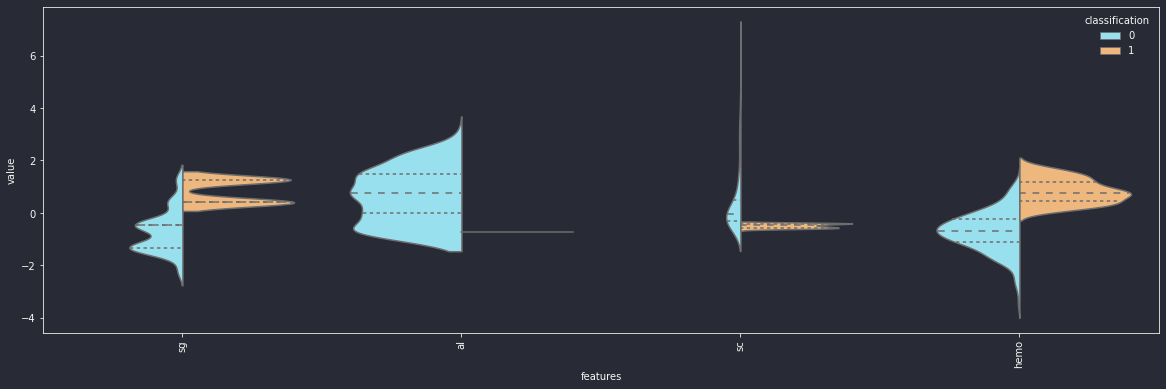

In [52]:
eda.voilin_plot(X[numeric_cols],y, total_features_to_include=8)

In [53]:
#VIF 
#fe = FeatureEngineering()
#vif = fe.calculate_vif(X[numeric_cols])
#vif

## Model Training And Evaluation 

In [58]:
X[categorical_cols].describe(include=['object'])

,pcv,htn
count,287,287
unique,40,2
top,44,no
freq,19,189


In [56]:
from sklearn.preprocessing import LabelEncoder
#Transform non-numeric columns into numerical columns
for column in categorical_cols:
        if X[column].dtype == np.number:
            continue
        X[column] = LabelEncoder().fit_transform(X[column])
X

C:\Users\92304\AppData\Local\Temp/ipykernel_34764/992250983.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X[column].dtype == np.number:


,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,28,1
1,1.020,4.0,0.8,11.3,22,0
2,1.010,2.0,1.8,9.6,15,0
3,1.005,4.0,3.8,11.2,16,1
4,1.010,2.0,1.4,11.6,19,0
...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,31,0
396,1.025,0.0,1.2,16.5,38,0
397,1.020,0.0,0.6,15.8,33,0
398,1.025,0.0,1.0,14.2,35,0


In [74]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((243, 6), (243,), (44, 6), (44,))

In [31]:
#Oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_over.shape, y_over.shape

((252, 6), (252,))

In [27]:
training = ModelTraining()

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1.45 s


<AxesSubplot:>

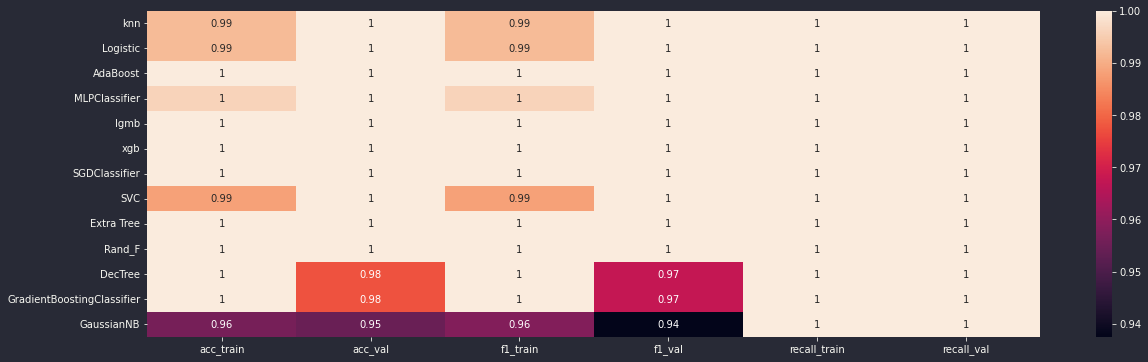

In [33]:
%%time
models = {
          'knn' : KNeighborsClassifier(),
          'Logistic': LogisticRegression(),
          'AdaBoost' : AdaBoostClassifier(),
          'DecTree': DecisionTreeClassifier(),
          'MLPClassifier' : MLPClassifier(),
          'lgmb' : lgbm.LGBMClassifier(),
          'xgb' : XGBClassifier(objective='binary:logistic'),
          'SGDClassifier' : SGDClassifier(),
          'GaussianNB' : GaussianNB(),
          #'MultinomialNB': MultinomialNB(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(),
          'SVC' : SVC(),
          'Extra Tree' : ExtraTreesClassifier(),
          'Rand_F' : RandomForestClassifier()
         }
sns.heatmap(training.compare_base_classifiers(models, X_train= X_over, y_train=y_over, X_val=X_test , y_val=y_test,
                                              imputer= SimpleImputer(missing_values= np.nan, strategy='mean'), scaler=StandardScaler(), cols_to_impute=X_train.columns,
                                              sort_by='acc_val'), annot=True);

**NOT** going with the **KNN** as it would consider all the data points and provide a heavy model so ill select **LogisticRegression** as it is providing the **exact same** results

In [68]:
model_finder = Model_Finder()

In [69]:
#Loading the data from the start
X 

,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,44,yes
1,1.020,4.0,0.8,11.3,38,no
2,1.010,2.0,1.8,9.6,31,no
3,1.005,4.0,3.8,11.2,32,yes
4,1.010,2.0,1.4,11.6,35,no
5,1.015,3.0,1.1,12.2,39,yes
6,1.010,0.0,24.0,12.4,36,no
7,1.015,2.0,1.1,12.4,44,no
8,1.015,3.0,1.9,10.8,33,yes
9,1.020,2.0,7.2,9.5,29,yes


In [18]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((243, 6), (243,), (44, 6), (44,))

In [70]:
from sklearn.base import TransformerMixin, BaseEstimator
class CustomLabelEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X ,y=None):
        le=LabelEncoder()
        for i in X[cat_cols]:
            X[i]=le.fit_transform(X[i])
        return X

In [72]:
cat_cols = ['htn']
ct = ColumnTransformer(remainder='passthrough',transformers=[
    ('encoder' , CustomLabelEncode(), cat_cols)
])
cc = ct.fit_transform(X_train)
cc

array([[0, 1.025, 0.0, 1.2, 16.9, '52'],
       [0, 1.025, 0.0, 0.5, 15.0, '46'],
       [1, 1.015, 4.0, 5.3, 12.0, '37'],
       ...,
       [1, 1.015, 2.0, 1.7, 12.5, '33'],
       [0, 1.025, 0.0, 0.7, 13.9, '49'],
       [0, 1.015, 0.0, 0.8, 14.3, '40']], dtype=object)

In [78]:
#final pipeline
cat_cols = ['htn']
ct = ColumnTransformer(remainder='passthrough',transformers=[
    ('encoder' , CustomLabelEncode(), cat_cols)
])
pipe = Pipeline([
    ('encoder', ct),
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias = True)),
    ('classifier',LogisticRegression())
])
pipe.fit(X_train, y_train)
pipe

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  CustomLabelEncode(),
                                                  ['htn'])])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('classifier', LogisticRegression())])

1.0
1.0


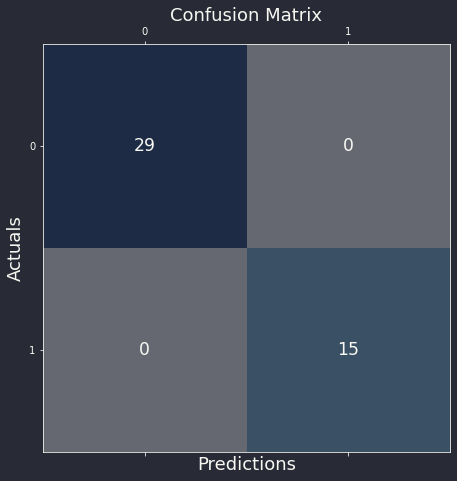

In [79]:
import gzip
with gzip.open('./models/kidney_model.pickle.gz', 'wb') as f:
    pickle.dump(pipe, f)
with gzip.open('./models/kidney_model.pickle.gz', 'rb') as f:
    loaded_pipeline = pickle.load(f)
print(loaded_pipeline.score(X_test, y_test))
print(f1_score(y_test, loaded_pipeline.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = loaded_pipeline.predict(X_test))

## Traing and saving the model on complete dataset

In [80]:
complete_X = pd.concat([X_train, X_test], axis=0)
complete_y = pd.concat([y_train, y_test], axis=0)
complete_X.shape, complete_y.shape

((287, 6), (287,))

In [42]:
df

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,44,yes,0
1,1.020,4.0,0.8,11.3,38,no,0
2,1.010,2.0,1.8,9.6,31,no,0
3,1.005,4.0,3.8,11.2,32,yes,0
4,1.010,2.0,1.4,11.6,35,no,0
...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,no,1
396,1.025,0.0,1.2,16.5,54,no,1
397,1.020,0.0,0.6,15.8,49,no,1
398,1.025,0.0,1.0,14.2,51,no,1


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 287, dtype: int64

In [39]:
X 

,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,44,yes
1,1.020,4.0,0.8,11.3,38,no
2,1.010,2.0,1.8,9.6,31,no
3,1.005,4.0,3.8,11.2,32,yes
4,1.010,2.0,1.4,11.6,35,no
...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,no
396,1.025,0.0,1.2,16.5,54,no
397,1.020,0.0,0.6,15.8,49,no
398,1.025,0.0,1.0,14.2,51,no


In [82]:
complete_X

,sg,al,sc,hemo,pcv,htn
284,1.025,0.0,1.2,16.9,52,no
366,1.025,0.0,0.5,15.0,46,no
133,1.015,4.0,5.3,12.0,37,yes
272,1.025,0.0,1.2,14.8,42,no
381,1.025,0.0,0.5,16.6,40,no
...,...,...,...,...,...,...
260,1.020,0.0,1.0,14.1,45,no
241,1.015,1.0,1.5,10.4,31,no
40,1.010,2.0,2.1,11.1,32,yes
27,1.010,3.0,2.7,12.5,37,yes


1.0
1.0


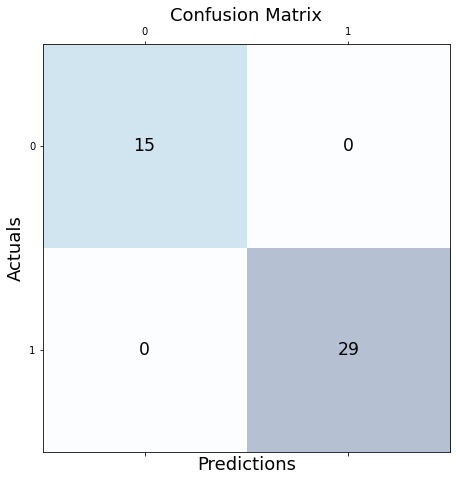

In [75]:
#final pipeline
cat_cols = ['htn']
ct = ColumnTransformer(remainder='passthrough',transformers=[
    ('encoder' , CustomLabelEncode(), cat_cols)
])
pipe = Pipeline([
    ('encoder', ct),
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias = True)),
    ('classifier',LogisticRegression())
])
pipe.fit(X, y)
with gzip.open('./models/kidney_model.pickle.gz', 'wb') as f:
    pickle.dump(pipe, f)
with gzip.open('./models/kidney_model.pickle.gz', 'rb') as f:
    loaded_pipeline = pickle.load(f)
print(loaded_pipeline.score(X_test, y_test))
print(f1_score(y_test, loaded_pipeline.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = loaded_pipeline.predict(X_test))

In [1]:
## RestAPI
import requests
res = requests.post('http://127.0.0.1:5000/predict_kidney', json={"values" : ["1.025","1","1.10","15.8","53","no"]})
if res.ok:
    print(res.text)#For text out put .json could be used to value output


No need to worry, as your probability of getting the disease is 0.12% which is less than 50%
